Original Data Shape: (150, 4)
scaler [[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.1699

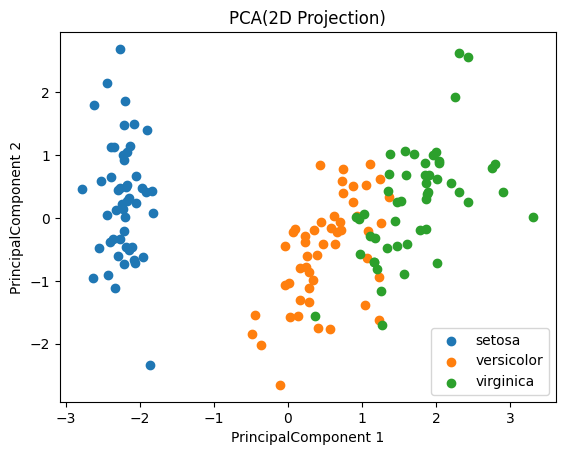

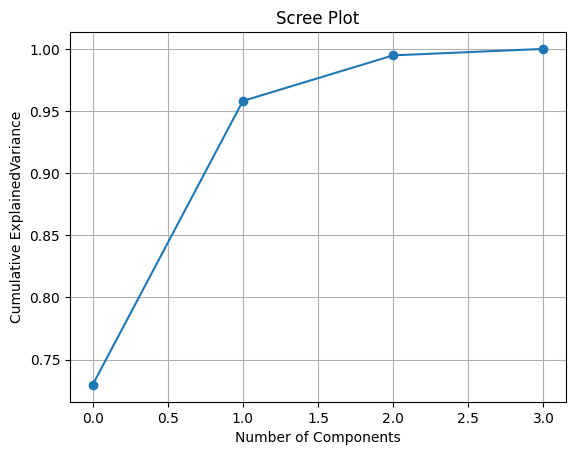

In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

# 2) Load the Iris dataset
data = load_iris()
X = data.data          # Feature matrix
y = data.target        # Target labels
target_names = data.target_names
print("Original Data Shape:",X.shape)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
minmax = MinMaxScaler()
X_normalized = minmax.fit_transform(X)
print("scaler",X_standardized)
print("Minmax",X_normalized)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)
print("\nExplained Variance Ratio:")
for i, var in enumerate(pca.explained_variance_ratio_):
  print(f"Principal Component {i+1}: {var:.4f}")
print("Cumulative Explained Variance:",np.cumsum(pca.explained_variance_ratio_))

plt.figure()
for i, target in enumerate(target_names):
  plt.scatter(X_pca[y ==i, 0], X_pca[y ==i, 1], label=target)
plt.xlabel("PrincipalComponent 1")
plt.ylabel("PrincipalComponent 2")
plt.title("PCA(2D Projection)")
plt.legend()
plt.show()

pca_full =PCA()
pca_full.fit(X_standardized)
plt.figure()
plt.plot(np.cumsum(pca_full.explained_variance_ratio_),marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative ExplainedVariance")
plt.title("Scree Plot")
plt.grid()
plt.show()